In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd 
data=pd.read_csv('/content/gdrive/MyDrive/machine learning/dataset/heart.csv')

### **Data prepocessing:**

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.describe()
# data looks good

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4c85081c0>,
      dtype=object)

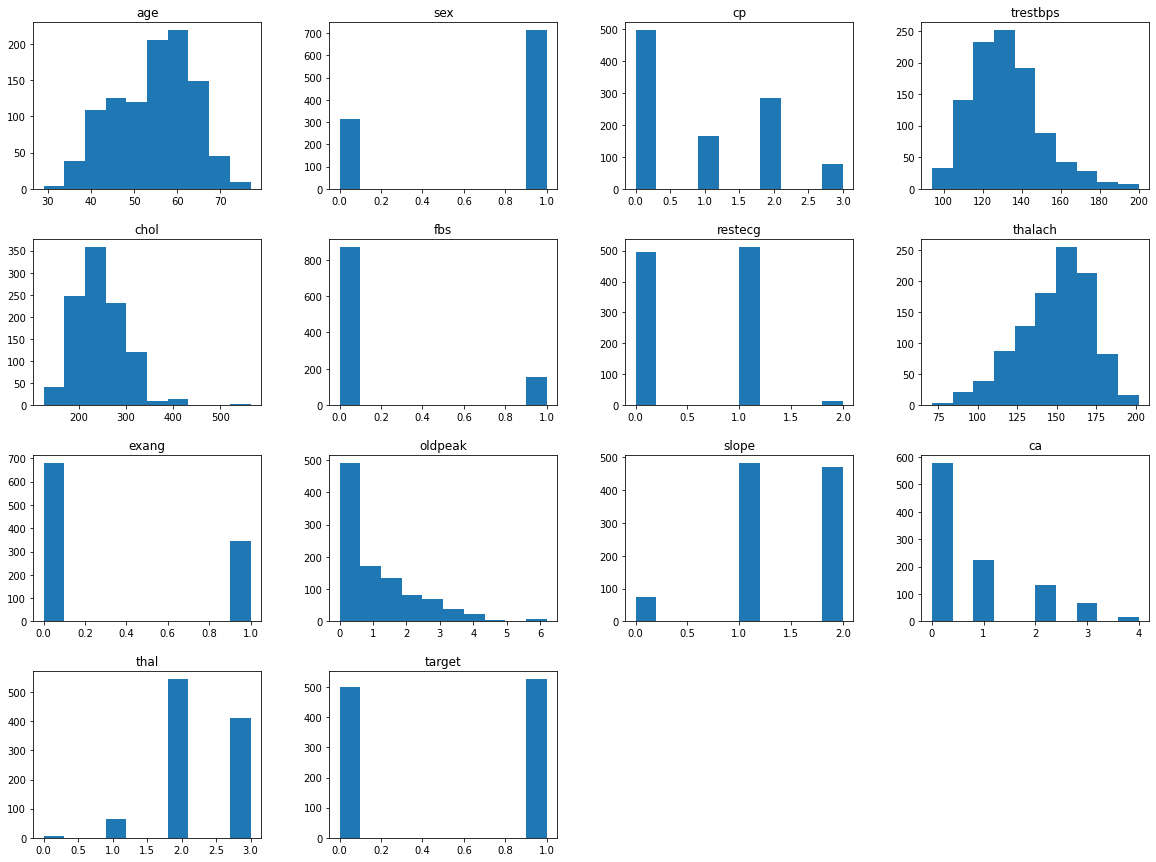

In [ ]:
#histgram
data.hist(figsize=(20,15),grid=False)

### **Linear Corrected:**

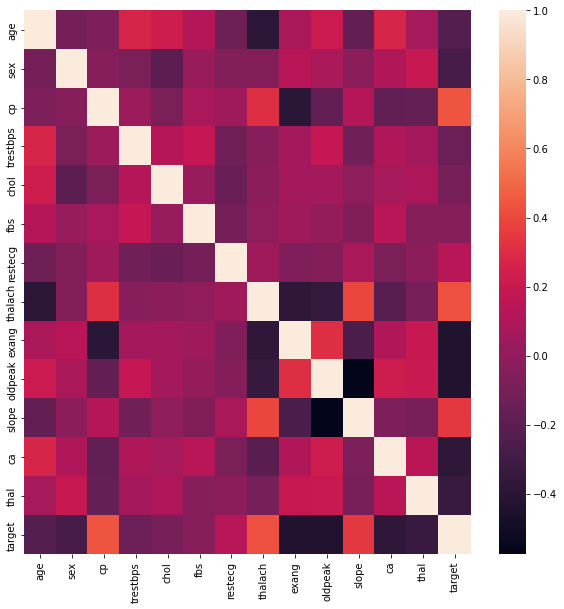

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

### **Split data:**

In [ ]:
X = data.iloc[:,:-1]
#print(X)
y = data.iloc[:,13]
#print(y)

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,shuffle=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=8)
classifier.fit(train_X,train_y)
y_pred = classifier.predict(test_X)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
acc = accuracy_score(test_y,y_pred)
print('the accuracy is: %s' %acc)
cfm = confusion_matrix(test_y,y_pred)
print('the confusion matrix is:\n%s' %cfm)

the accuracy is: 0.9415584415584416
the confusion matrix is:
[[145  10]
 [  8 145]]


In [ ]:
criterion = ['gini','entropy']
for i in criterion:
  for j in range (2,13):
    clf = DecisionTreeClassifier(criterion= i, max_depth = j)
    clf.fit(train_X,train_y)
    y_pred = clf.predict(test_X)
    acc = accuracy_score(test_y,y_pred)
    print('with criterion %s and max depth %s, the accuracy is %s:' %(i,j,acc))

with criterion gini and max depth 2, the accuracy is 0.7564935064935064:
with criterion gini and max depth 3, the accuracy is 0.8214285714285714:
with criterion gini and max depth 4, the accuracy is 0.814935064935065:
with criterion gini and max depth 5, the accuracy is 0.8214285714285714:
with criterion gini and max depth 6, the accuracy is 0.8733766233766234:
with criterion gini and max depth 7, the accuracy is 0.9285714285714286:
with criterion gini and max depth 8, the accuracy is 0.9837662337662337:
with criterion gini and max depth 9, the accuracy is 0.9902597402597403:
with criterion gini and max depth 10, the accuracy is 0.9902597402597403:
with criterion gini and max depth 11, the accuracy is 0.9902597402597403:
with criterion gini and max depth 12, the accuracy is 0.9902597402597403:
with criterion entropy and max depth 2, the accuracy is 0.7337662337662337:
with criterion entropy and max depth 3, the accuracy is 0.7922077922077922:
with criterion entropy and max depth 4, the

### ***Visualize:***

In [ ]:
from sklearn import tree
x=tree.export_text(classifier)
print(x)

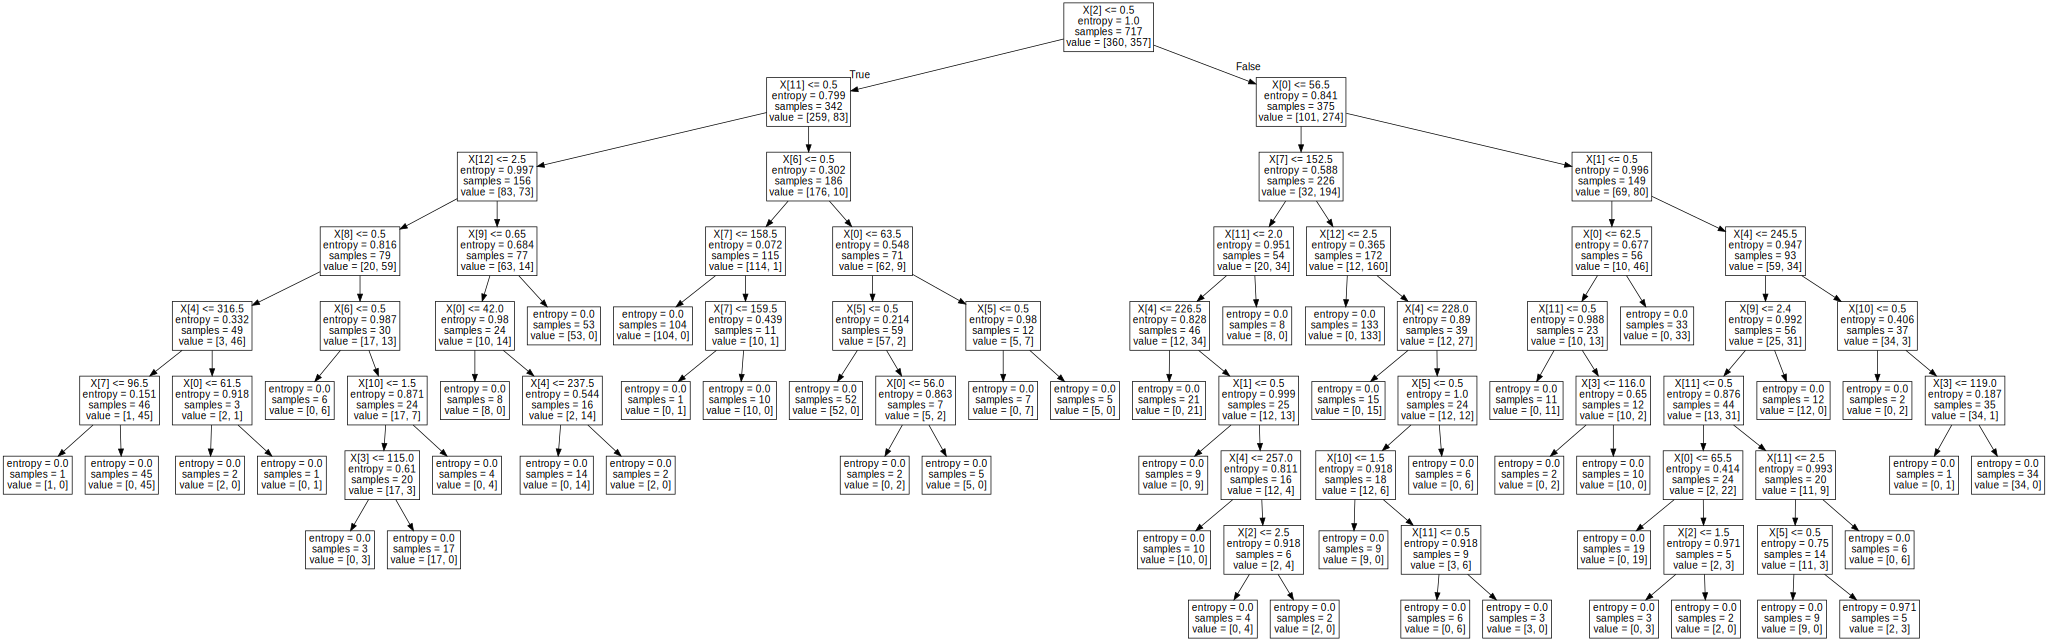

<Figure size 1080x720 with 0 Axes>

In [ ]:
import graphviz
plt.figure(figsize=(15,10))

y = tree.export_graphviz(classifier)
graph = graphviz.Source(y, format="png") 
graph

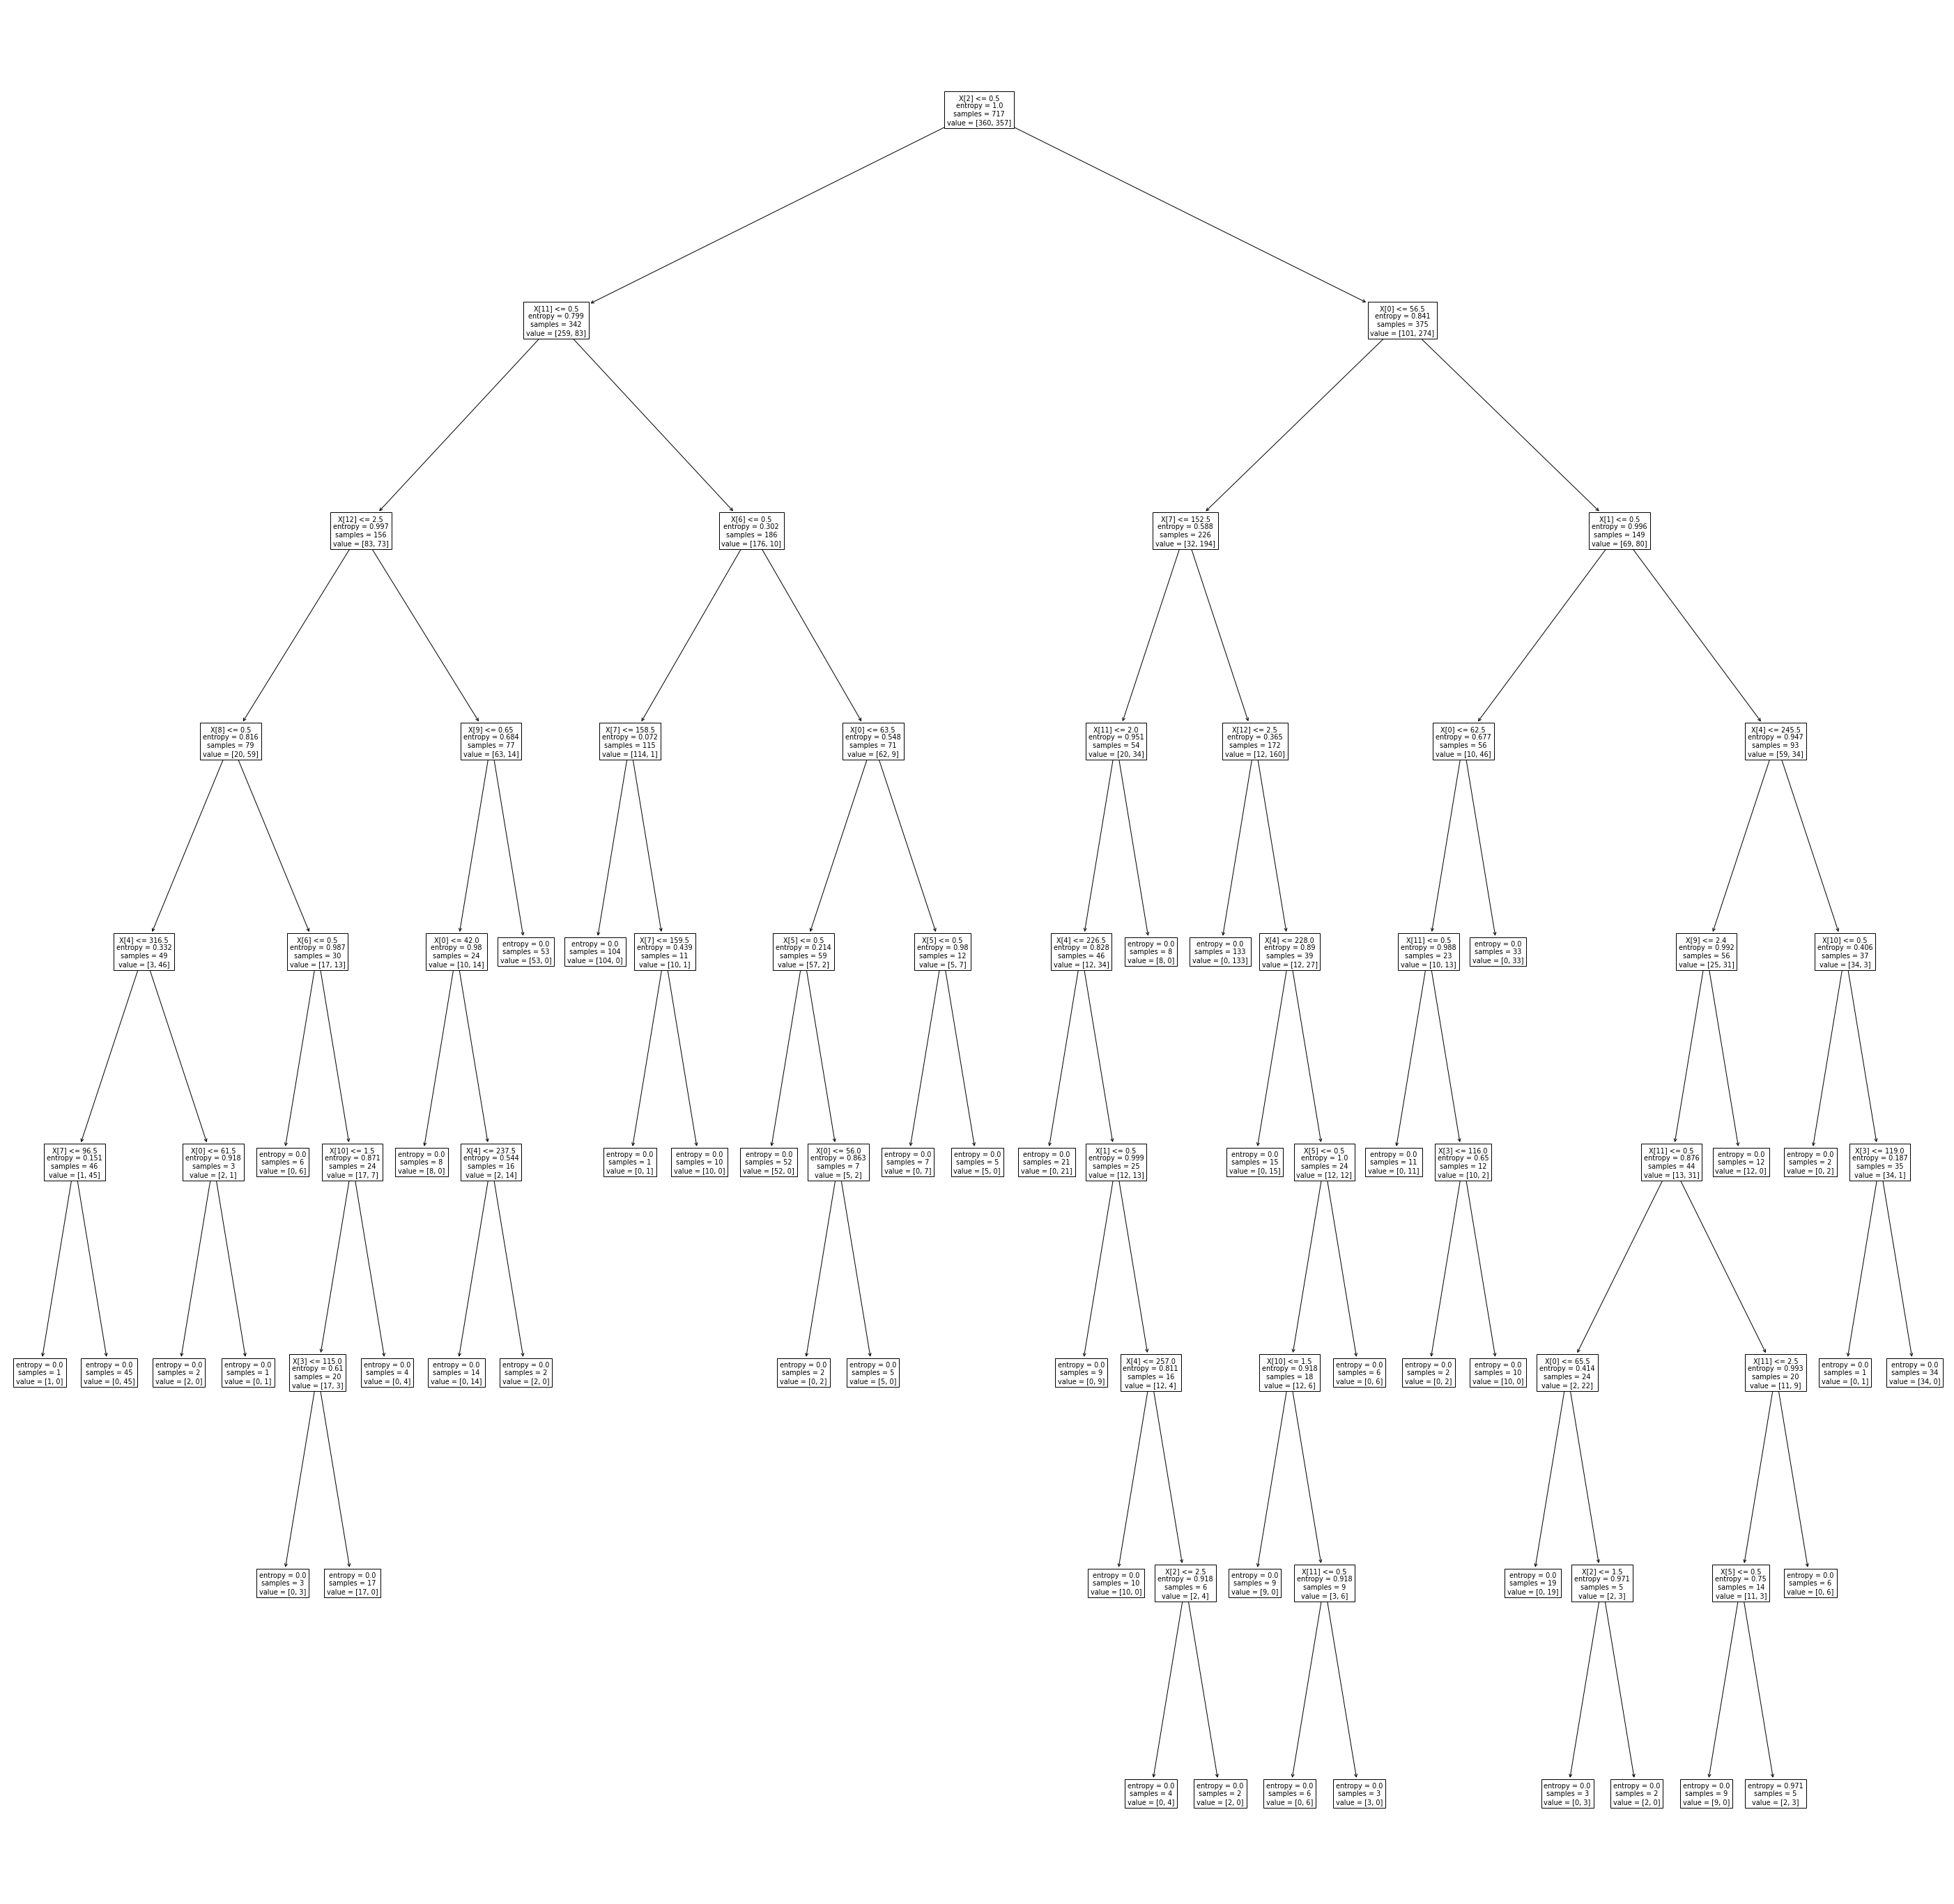

In [ ]:
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(classifier)